# Khai bao thu vien

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization



# Lấy dữ liệu

In [3]:
def get_df():
    df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/multivariate/exchange_rate/exchange_rate.txt",header=None)
    return df

dataset = get_df()
dataset.head()

,0,1,2,3,4,5,6,7
0,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.5930,0.525486
1,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.5940,0.523972
2,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.5973,0.526316
3,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.5970,0.523834
4,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.5985,0.527426


Slice window

In [4]:
import pandas as pd

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [5]:
data = series_to_supervised(dataset, n_in=3, n_out=1)
print(data)

      var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3      0.785500   1.611000   0.861698   0.634196   0.211242   0.006838   
4      0.781800   1.610000   0.861104   0.633513   0.211242   0.006863   
5      0.786700   1.629300   0.861030   0.648508   0.211242   0.006975   
6      0.786000   1.637000   0.862069   0.650618   0.211242   0.006953   
7      0.784900   1.653000   0.861995   0.656254   0.211242   0.006940   
...         ...        ...        ...        ...        ...        ...   
7583   0.719114   1.227800   0.738089   0.973189   0.143962   0.008527   
7584   0.719735   1.228501   0.740384   0.973047   0.143972   0.008537   
7585   0.718701   1.226001   0.737776   0.972479   0.143833   0.008510   
7586   0.718494   1.222195   0.737485   0.969974   0.143697   0.008500   
7587   0.721839   1.223459   0.741155   0.977297   0.143763   0.008595   

      var7(t-3)  var8(t-3)  var1(t-2)  var2(t-2)  ...  var7(t-1)  var8(t-1)  \
3      0.593000   0.525486   0.7

In [16]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
print(X.shape)
print(Y.shape)

(7588, 7)
(7588,)


Train model AdaBoostRegressor

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import AdaBoostRegressor

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

# # Initialize the estimator
estimator = AdaBoostRegressor(n_estimators=500, learning_rate=0.05)

# Fit the data
estimator.fit(np.array(X_train), Y_train)

# Make predictions
pred = estimator.predict(np.array(X_test))

# Calculate metrics
print(mean_squared_error(Y_test, pred))
print(mean_absolute_percentage_error(Y_test, pred))
print(r2_score(Y_test, pred))

0.000981033988689464
0.031124950043086644
0.33410846993195764


Trực quan hóa dữ liệu

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def draw_true_predict(y_true, y_pred):
    size = len(y_true)
    plt.plot(list(range(size)), y_true, label='real', color='blue')
    plt.plot(list(range(size)), y_pred, label='predicted', color='red')
    plt.legend(loc='best')
    plt.title('Real vs Predicted values')
    plt.show()

def calculate_metrics(y_true, y_pred):
    # Calculate metrics
    MSE = mean_squared_error(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    print(f"MSE: {MSE}, MAPE: {MAPE}, R2: {R2}")

Trực quan hóa kết quả

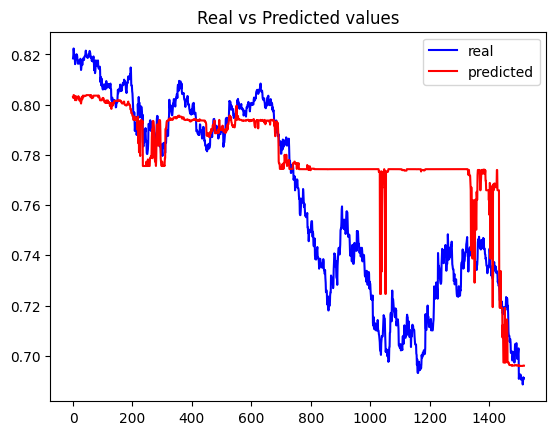

In [13]:
draw_true_predict(Y_test, pred)

RandomForestRegressor


MSE: 0.0010473017922393295, MAPE: 0.033594470173893415, R2: 0.28912820461106215


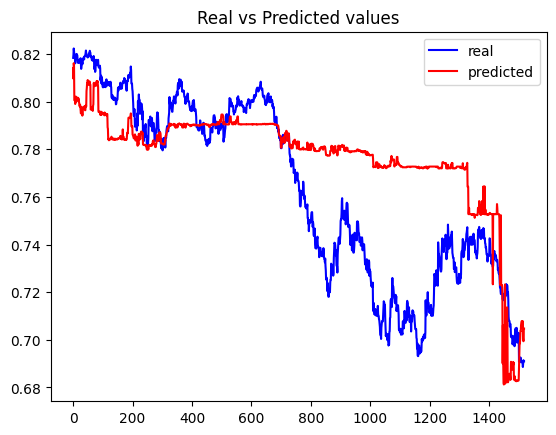

In [14]:
from sklearn.ensemble import RandomForestRegressor
X  = np.array(X)
# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

# Initialize the estimator
estimator = RandomForestRegressor()

# Fit the data
estimator.fit(X_train, Y_train)

# Make predictions
pred = estimator.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

C:\Users\phuoc\AppData\Local\Temp\ipykernel_25552\3675365201.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train_scaled, Y_train_scaled)


MSE: 0.0010981209686753595, MAPE: 0.034037954145461645, R2: 0.2546339265901836


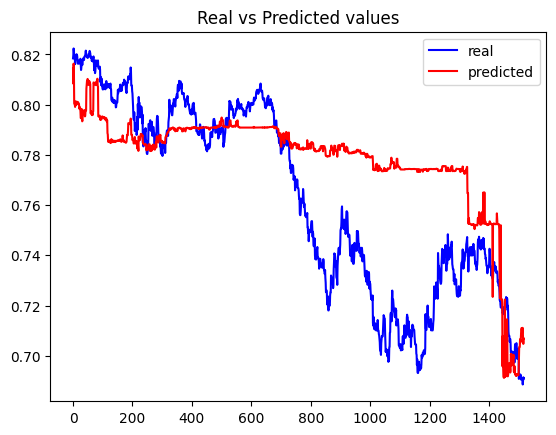

In [17]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)
Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

scaler_feature = StandardScaler()
scaler_feature.fit(X_train)
X_train_scaled = scaler_feature.transform(X_train)
X_test_scaled = scaler_feature.transform(X_test)

scaler_label = StandardScaler()
scaler_label.fit(Y_train)
Y_train_scaled = scaler_label.transform(Y_train)
Y_test_scaled = scaler_label.transform(Y_test)


# Initialize the estimator
estimator = RandomForestRegressor()

# Fit the data
estimator.fit(X_train_scaled, Y_train_scaled)

# Make predictions
y_pred = estimator.predict(X_test_scaled)
y_pred_unscaled = scaler_label.inverse_transform(np.reshape(y_pred, (-1, 1)))

# Calculate metrics
calculate_metrics(Y_test, y_pred_unscaled)

draw_true_predict(Y_test, y_pred_unscaled)

MSE: 0.5159755556895562, MAPE: 0.6625482119999974, R2: -1.4028399771276945


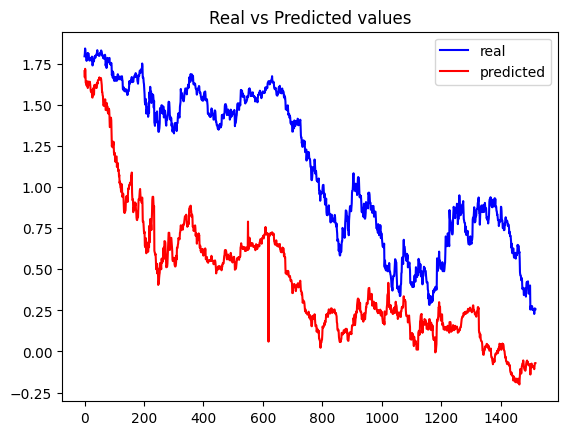

In [18]:
from sklearn.preprocessing import scale
from sklearn.svm import SVR

x = scale(X)
y = scale(Y)

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)

# Initialize the estimator
estimator = rfr = SVR(C=10, epsilon=0.1)

# Fit the data
estimator.fit(X_train, Y_train)

# Make predictions
pred = estimator.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

GridSearchCV

In [19]:
## Hyper-parameter tuning using GridSearchCV

from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

x = scale(X)
y = scale(Y)

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)

# defining parameter range
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.1, 0.2, 0.3, 0.5, 1.0],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# defining the gridsearchCV object
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)

# Fit the data
grid.fit(X_train, Y_train)

# Make predictions
pred = grid.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-7.085 total time=   0.4s
[CV 2/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-0.038 total time=   0.3s
[CV 3/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-1.826 total time=   0.3s
[CV 4/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-0.262 total time=   0.4s
[CV 5/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-2.859 total time=   0.3s
[CV 1/5] END C=0.1, epsilon=0.1, kernel=linear;, score=-1.820 total time=   0.5s
[CV 2/5] END C=0.1, epsilon=0.1, kernel=linear;, score=-0.902 total time=   0.6s
[CV 3/5] END C=0.1, epsilon=0.1, kernel=linear;, score=-4.902 total time=   0.6s
[CV 4/5] END C=0.1, epsilon=0.1, kernel=linear;, score=-0.173 total time=   0.5s
[CV 5/5] END C=0.1, epsilon=0.1, kernel=linear;, score=-1.287 total time=   0.5s
[CV 1/5] END ..C=0.1, epsilon=0.1, kernel=poly;, score=-5.201 total time=   0.4s
[CV 2/5] END ...C=0.1, epsilon=0.1, kernel=pol

MSE: 1.0764985005761452, MAPE: 27.57285114619042, R2: 0.0878704669502538


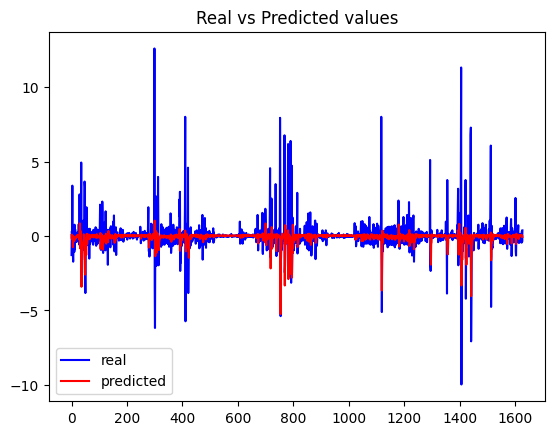

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)

# Make pipeline
pipe = make_pipeline(StandardScaler(), SVR(C=10, epsilon=0.2))
pipe.fit(X_train, Y_train)

# Make predictions
pred = pipe.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)


Pipeline

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV


#++++++++++++++++++++++++++++++++++++
#+ create train and test sets
#++++++++++++++++++++++++++++++++++++
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)


#++++++++++++++++++++++++++++++++
# create the pipeline object
#++++++++++++++++++++++++++++++++
steps = [('scaler', StandardScaler()), ('SVR', SVR())]
pipeline = Pipeline(steps)


#++++++++++++++++++++++++++++++++++++++
#+ create the hyperparameter space
#++++++++++++++++++++++++++++++++++++++
parameteres = {
    'SVR__C': [0.1, 1, 10, 100, 1000],
    'SVR__epsilon': [0.1, 0.2, 0.3, 0.5, 1.0],
    'SVR__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

#++++++++++++++++++++++++++++++
#+ Grid Search Cross Validation
#++++++++++++++++++++++++++++++
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, verbose=3)

# Fit the data
grid.fit(X_train, Y_train)

# get the best parameters
print(grid.best_params_)

# Make predictions
pred = grid.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.061 total time=   1.1s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.055 total time=   1.1s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.057 total time=   1.1s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.036 total time=   0.9s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.028 total time=   1.1s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.001 total time=   0.7s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.033 total time=   0.7s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.054 total time=   1.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.023 total time=   0.8s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.010 total time=   0.8s


KeyboardInterrupt: 